In [ ]:
import pandas as pd
import jieba
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import numpy

In [2]:
df_news1=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\1_Zlatan Ibrahimovic returns to Italian giants AC Milan_sport.txt',names=['content'],sep='\t',encoding='utf-8')
df_news2=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\2_Syria issue_politics.txt',names=['content'],sep='\t',encoding='utf-8')
df_news3=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\3_League of Legends World Championship_esport.txt',names=['content'],sep='\t',encoding='utf-8')
df_news4=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\4_Pop star Ellie Goulding_entertainment.txt',names=['content'],sep='\t',encoding='utf-8')
df_news5=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\5_Fortnite gives away $3 million to champion_esport.txt',names=['content'],sep='\t',encoding='utf-8')
df_news6=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\6_How to become one of the worlds best professional gamers_esport.txt',names=['content'],sep='\t',encoding='utf-8')
df_news7=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\7_Apex is turning to esports_esport.txt',names=['content'],sep='\t',encoding='utf-8')
df_news8=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\8_Inside the worlds first professional FIFA house_esport.txt',names=['content'],sep='\t',encoding='utf-8')
df_news9=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\9_Cristiano Ronaldo wants to try acting when he is done with football_sport.txt',names=['content'],sep='\t',encoding='utf-8')
df_news10=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\10_Is Premier League title Liverpool is already_sport.txt',names=['content'],sep='\t',encoding='utf-8')
df_news11=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\11_Teenage wonderkid Erling Haland joins Dortmund_sport.txt',names=['content'],sep='\t',encoding='utf-8')
df_news12=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\12_Rafa Nadal guides Spain to emotional Davis Cup title_sport.txt',names=['content'],sep='\t',encoding='utf-8')
df_news13=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\13_The power and presence of the $120 million man_sport.txt',names=['content'],sep='\t',encoding='utf-8')
df_news14=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\14_Netflix UK reveals top 10 shows of 2019_entertainment.txt',names=['content'],sep='\t',encoding='utf-8')
df_news15=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\15_Christine Keeler soft porn drama divides critics_entertainment.txt',names=['content'],sep='\t',encoding='utf-8')
df_news16=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\16_TV in 2020_entertainment.txt',names=['content'],sep='\t',encoding='utf-8')
df_news17=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\17_All Creatures Great and Small_entertainment.txt',names=['content'],sep='\t',encoding='utf-8')
df_news18=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\18_The Bay_entertainment.txt',names=['content'],sep='\t',encoding='utf-8')
df_news19=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\19_Why fear has gripped Muslims in this Indian state_politics.txt',names=['content'],sep='\t',encoding='utf-8')
df_news20=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\20_Bushfires turned day to night_politics.txt',names=['content'],sep='\t',encoding='utf-8')
df_news1=df_news1.reset_index(drop=True)
df_news2=df_news2.reset_index(drop=True)
df_news3=df_news3.reset_index(drop=True)
df_news4=df_news4.reset_index(drop=True)
df_news5=df_news5.reset_index(drop=True)
df_news6=df_news6.reset_index(drop=True)
df_news7=df_news7.reset_index(drop=True)
df_news8=df_news8.reset_index(drop=True)
df_news9=df_news9.reset_index(drop=True)
df_news10=df_news10.reset_index(drop=True)
df_news11=df_news11.reset_index(drop=True)
df_news12=df_news12.reset_index(drop=True)
df_news13=df_news13.reset_index(drop=True)
df_news14=df_news14.reset_index(drop=True)
df_news15=df_news15.reset_index(drop=True)
df_news16=df_news16.reset_index(drop=True)
df_news17=df_news17.reset_index(drop=True)
df_news18=df_news18.reset_index(drop=True)
df_news19=df_news19.reset_index(drop=True)
df_news20=df_news20.reset_index(drop=True)
df = pd.concat([df_news1,df_news2,df_news3,df_news4,df_news5,df_news6,df_news7,df_news8,df_news9,df_news10,df_news11,df_news12,df_news13,df_news14,df_news15,df_news16,df_news17,df_news18,df_news19,df_news20])
df =df.reset_index(drop=True) 
df['category']=['sport','politics','esport','entertainment','esport','esport','esport','esport','sport','sport','sport','sport','sport','entertainment','entertainment','entertainment','entertainment','entertainment','politics','politics']
df['theme']=['Zlatan Ibrahimovic returns to Italian giants AC Milan','Syria issue','League of Legends World Championship','Pop star Ellie Goulding','Fortnite gives away $3 million to champion','How to become one of the worlds best professional gamers','Apex is turning to esports','Inside the worlds first professional FIFA house','Cristiano Ronaldo wants to try acting when he is done with football','Is Premier League title Liverpool is already','Teenage wonderkid Erling Haland joins Dortmund','Rafa Nadal guides Spain to emotional Davis Cup title','The power and presence of the $120 million man','Netflix UK reveals top 10 shows of 2019','Christine Keeler soft porn drama divides critics','TV in 2020','All Creatures Great and Small','The Bay','Why fear has gripped Muslims in this Indian state','Bushfires turned day to night']
df


,content,category,theme
0,He's back. Zlatan Ibrahimovic has returned to ...,sport,Zlatan Ibrahimovic returns to Italian giants A...
1,"More than 235,000 people have fled from their ...",politics,Syria issue
2,Chinese team FunPlus Phoenix (FPX) defeated Eu...,esport,League of Legends World Championship
3,Pop star Ellie Goulding has scored the final n...,entertainment,Pop star Ellie Goulding
4,Fortnite has wrapped its first-ever massive sp...,esport,Fortnite gives away $3 million to champion
5,"Luka ""Perkz"" Perkovic still remembers the firs...",esport,How to become one of the worlds best professio...
6,Fortnite soared to the top of the video game w...,esport,Apex is turning to esports
7,"At first glance, nothing seems out of the ordi...",esport,Inside the worlds first professional FIFA house
8,"Juventus and Portugal fans, don't worry, Crist...",sport,Cristiano Ronaldo wants to try acting when he ...
9,"Last season, the title race in the English Pre...",sport,Is Premier League title Liverpool is already


In [3]:
content=df.content.values.tolist()
print(content[0])

He's back. Zlatan Ibrahimovic has returned to European football at the age of 38, after agreeing to rejoin Italian club AC Milan.Since the forward's contract at LA Galaxy expired in December, a host of clubs have reportedly been interested in the former Sweden international.In his first statement back in Milan, Ibrahimovic said, "I'm coming back to a club I hugely respect and to the city of Milan I love. I'll fight together with my teammates to change the course of this season. I will do everything to make it happen." He has initially signed a six month deal with a reported €3.5 million salary, with an option to extend the contract for one more season. The Swedish striker played for Milan between 2010 and 2012 and scored 56 goals in 85 games during his time the club.He helped them to their 18th Serie A title in 2011, the club's last major trophy.Ibrahimovic will undergo a medical on January 2nd in Milan.AC Milan is 11th in Serie A, with 21 points from 17 games. Having sacked coach Marc

In [4]:
content_S=[]
for line in content:
    current_segment=word_tokenize(line)
    if len(current_segment)> 1 and current_segment !='\r\n\s':
        content_S.append(current_segment)

In [5]:
content_S[0]


['He',
 "'s",
 'back',
 '.',
 'Zlatan',
 'Ibrahimovic',
 'has',
 'returned',
 'to',
 'European',
 'football',
 'at',
 'the',
 'age',
 'of',
 '38',
 ',',
 'after',
 'agreeing',
 'to',
 'rejoin',
 'Italian',
 'club',
 'AC',
 'Milan.Since',
 'the',
 'forward',
 "'s",
 'contract',
 'at',
 'LA',
 'Galaxy',
 'expired',
 'in',
 'December',
 ',',
 'a',
 'host',
 'of',
 'clubs',
 'have',
 'reportedly',
 'been',
 'interested',
 'in',
 'the',
 'former',
 'Sweden',
 'international.In',
 'his',
 'first',
 'statement',
 'back',
 'in',
 'Milan',
 ',',
 'Ibrahimovic',
 'said',
 ',',
 '``',
 'I',
 "'m",
 'coming',
 'back',
 'to',
 'a',
 'club',
 'I',
 'hugely',
 'respect',
 'and',
 'to',
 'the',
 'city',
 'of',
 'Milan',
 'I',
 'love',
 '.',
 'I',
 "'ll",
 'fight',
 'together',
 'with',
 'my',
 'teammates',
 'to',
 'change',
 'the',
 'course',
 'of',
 'this',
 'season',
 '.',
 'I',
 'will',
 'do',
 'everything',
 'to',
 'make',
 'it',
 'happen',
 '.',
 "''",
 'He',
 'has',
 'initially',
 'signed',
 'a'

In [6]:
df_content=pd.DataFrame({'content_S':content_S})

df_content

,content_S
0,"[He, 's, back, ., Zlatan, Ibrahimovic, has, re..."
1,"[More, than, 235,000, people, have, fled, from..."
2,"[Chinese, team, FunPlus, Phoenix, (, FPX, ), d..."
3,"[Pop, star, Ellie, Goulding, has, scored, the,..."
4,"[Fortnite, has, wrapped, its, first-ever, mass..."
5,"[Luka, ``, Perkz, '', Perkovic, still, remembe..."
6,"[Fortnite, soared, to, the, top, of, the, vide..."
7,"[At, first, glance, ,, nothing, seems, out, of..."
8,"[Juventus, and, Portugal, fans, ,, do, n't, wo..."
9,"[Last, season, ,, the, title, race, in, the, E..."


In [7]:
#stopwords=pd.read_csv(r'C:\Users\dell\Desktop\AI_project\stopword.txt',names=['stopword'],sep='\t',encoding='utf-8')
stopWords = set(stopwords.words('english'))
stopWords

{'!',
 '"',
 '""',
 "''",
 "'s",
 '(',
 ')',
 ',',
 '--',
 '.',
 '?',
 'I',
 'The',
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'first',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'last',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 "n't",
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o'

In [8]:
def drop_stopwords(contents,stopwords):
    contents_clean=[]
    all_words=[]
    for line in contents:
        line_clean=[]
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words
contents=df_content.content_S.values.tolist()
stopwords=stopWords
contents_clean,all_words=drop_stopwords(contents,stopwords)

In [9]:
df_content=pd.DataFrame({'contents_clean':contents_clean})
df_content

,contents_clean
0,"[He, back, Zlatan, Ibrahimovic, returned, Euro..."
1,"[More, 235,000, people, fled, homes, Syria, re..."
2,"[Chinese, team, FunPlus, Phoenix, FPX, defeate..."
3,"[Pop, star, Ellie, Goulding, scored, final, nu..."
4,"[Fortnite, wrapped, first-ever, massive, sport..."
5,"[Luka, Perkz, Perkovic, still, remembers, time..."
6,"[Fortnite, soared, top, video, game, world, la..."
7,"[At, glance, nothing, seems, ordinary, suburba..."
8,"[Juventus, Portugal, fans, worry, Cristiano, R..."
9,"[Last, season, title, race, English, Premier, ..."


In [10]:
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,He
1,back
2,Zlatan
3,Ibrahimovic
4,returned


In [11]:
words_count=df_all_words.groupby(by=['all_words'])['all_words'].agg({"count":numpy.size})
words_count=words_count.reset_index().sort_values(by=["count"],ascending=False)
words_count.head()

C:\Users\dell\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,all_words,count
920,team,9
845,series,7
559,games,7
833,season,7
389,best,6


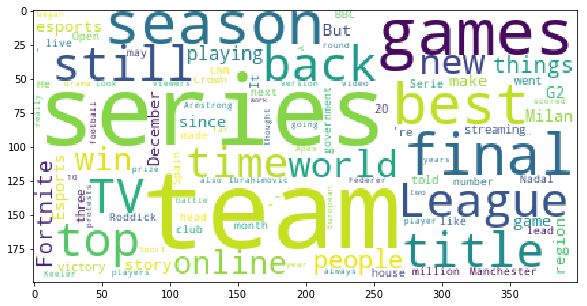

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(10.0,5.0)
wordcloud=WordCloud(background_color="white",max_font_size=80)
word_frequence={x[0]:x[1]for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)


In [13]:
#TF IDF
import jieba.analyse
from rake_nltk import Rake
r=Rake()
index=0
print(df['content'][index])
#content_S_str="".join(content_S[index])
#print(" ".join(r.extract_keywords_from_text(content_S_str)))



He's back. Zlatan Ibrahimovic has returned to European football at the age of 38, after agreeing to rejoin Italian club AC Milan.Since the forward's contract at LA Galaxy expired in December, a host of clubs have reportedly been interested in the former Sweden international.In his first statement back in Milan, Ibrahimovic said, "I'm coming back to a club I hugely respect and to the city of Milan I love. I'll fight together with my teammates to change the course of this season. I will do everything to make it happen." He has initially signed a six month deal with a reported €3.5 million salary, with an option to extend the contract for one more season. The Swedish striker played for Milan between 2010 and 2012 and scored 56 goals in 85 games during his time the club.He helped them to their 18th Serie A title in 2011, the club's last major trophy.Ibrahimovic will undergo a medical on January 2nd in Milan.AC Milan is 11th in Serie A, with 21 points from 17 games. Having sacked coach Marc

In [14]:
#LDA model
from gensim import corpora,models,similarities
import gensim
dictionary = corpora.Dictionary(contents_clean)
corpus = [dictionary.doc2bow(sentence) for sentence in contents_clean]
lda = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=4)
print(lda.print_topic(1,topn=5))


0.008*"Fortnite" + 0.006*"Apex" + 0.006*"game" + 0.006*"—" + 0.005*"top"


In [15]:
for topic in  lda.print_topics(num_topics=4,num_words=5):
    print(topic[1])

0.005*"Milan" + 0.005*"season" + 0.005*"back" + 0.005*"games" + 0.005*"December"
0.008*"Fortnite" + 0.006*"Apex" + 0.006*"game" + 0.006*"—" + 0.005*"top"
0.007*"team" + 0.006*"League" + 0.006*"games" + 0.006*"best" + 0.005*"Esports"
0.007*"TV" + 0.006*"series" + 0.005*"still" + 0.004*"new" + 0.004*"20"


In [16]:
df_train=pd.DataFrame({'contents_clean':contents_clean,'label':df['category']})
print(df_train.tail())
print(df_train.label.unique())

                                       contents_clean          label
15  [With, explosion, streaming, choice, TV, viewe...  entertainment
16  [original, BBC, adaptation, pictured, huge, hi...  entertainment
17  [Set, coastal, town, Morecambe, series, two, c...  entertainment
18  [Northern, India, Uttar, Pradesh, worst, affec...       politics
19  [Mallacoota, tourist, town, Victoria, Australi...       politics
['sport' 'politics' 'esport' 'entertainment']


In [17]:
label_mapping = {"sport": 1, "esport": 2, "politics": 3, "entertainment": 4}
df_train['label'] = df_train['label'].map(label_mapping) 
print(df_train.head())


                                      contents_clean  label
0  [He, back, Zlatan, Ibrahimovic, returned, Euro...      1
1  [More, 235,000, people, fled, homes, Syria, re...      3
2  [Chinese, team, FunPlus, Phoenix, FPX, defeate...      2
3  [Pop, star, Ellie, Goulding, scored, final, nu...      4
4  [Fortnite, wrapped, first-ever, massive, sport...      2


In [18]:
def create_words(data):
    words = []
    for index in range(len(data)):
        try:
            words.append( ' '.join(data[index]))
        except Exception:
            print(index)
    return words

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values, random_state=1)
train_words = create_words(x_train)
test_words = create_words(x_test)
test_words[0]

'Pop star Ellie Goulding scored final number decade version Joni Mitchell River.Her track dethrones LadBaby Love Sausage Rolls plummets number 57 week chart.River Goulding third number following 2013 Burn 2015 Love Me Like You Do.She managed achievement despite song Amazon exclusive meaning unavailable Spotify Apple Music streaming services.However fans could stream song YouTube accompanied video highlighting problem plastic pollution'

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(analyzer = 'word',max_features=4000,lowercase=False)
vec.fit(train_words)
classifier = MultinomialNB()
classifier.fit(vec.transform(train_words),y_train)
print('test_words_sorce',classifier.score(vec.transform(test_words), y_test))
predictions = classifier.predict(vec.transform(test_words))
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print("Accuracy score: ", accuracy_score(y_test, predictions))
print("Recall score: ", recall_score(y_test, predictions, average = 'weighted'))
print("Precision score: ", precision_score(y_test, predictions, average = 'weighted'))
print("F1 score: ", f1_score(y_test, predictions, average = 'weighted'))
predictions

test_words_sorce 0.8
Accuracy score:  0.8
Recall score:  0.8
Precision score:  0.6666666666666666
F1 score:  0.72


E:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([4, 4, 2, 4, 2], dtype=int64)

In [20]:
df_test=pd.DataFrame()
df_test['content']=test_words
df_test['label']=predictions
label_mapping = {1: "sport", 2: "esport", 3:"politics", 4:"entertainment"}
df_test['label'] = df_test['label'].map(label_mapping)
df_test['theme'] = ['Pop star Ellie Goulding','All Creatures Great and Small','Apex is turning to esports','TV in 2020','League of Legends World Championship']
df_test
df_test.to_csv('test.csv') 

In [21]:
#Generate rdf
import rdflib
g = rdflib.Graph()
##########
is_part_of = rdflib.URIRef('http://www.example.org/is_part_of')
########
news1= rdflib.URIRef('http://www.example.org/Pop_star_Ellie_Goulding')
news2 = rdflib.URIRef('http://www.example.org/All_Creature_Great_and_Small')
news3  = rdflib.URIRef('http://www.example.org/Apex_is_turning_to_esports')
news4  = rdflib.URIRef('http://www.example.org/TV_in_2020')
news5  = rdflib.URIRef('http://www.example.org/League_of_Legends_World_Championship')
    ##############
entertainment = rdflib.URIRef('http://www.example.org/entertainment')
esport= rdflib.URIRef('http://www.example.org/esport')
    ##############
g.add((news1,is_part_of,entertainment))
g.add((news2,is_part_of,entertainment))
g.add((news3,is_part_of,esport))
g.add((news4,is_part_of,entertainment))
g.add((news5,is_part_of,esport))

  
g.serialize("graph.rdf")


In [22]:
g = rdflib.Graph()
g.parse("graph.rdf", format="xml")  
q = "select ?relation ?part where { <http://www.example.org/Pop_star_Ellie_Goulding> ?relation ?part}"
x = g.query(q)
t = list(x) 
  
print(len(t))  
print(t)
    # <?,b,?>
q = "select ?news ?part where {?news <http://www.example.org/is_part_of> ?part}"
x = g.query(q)
t = list(x)
print(len(t))
print(t)
q = "select ?news ?relation where {?news ?relation <http://www.example.org/esport>}"
x = g.query(q)
t = list(x)
print(len(t))
print(t)


1
[(rdflib.term.URIRef('http://www.example.org/is_part_of'), rdflib.term.URIRef('http://www.example.org/entertainment'))]
5
[(rdflib.term.URIRef('http://www.example.org/TV_in_2020'), rdflib.term.URIRef('http://www.example.org/entertainment')), (rdflib.term.URIRef('http://www.example.org/All_Creature_Great_and_Small'), rdflib.term.URIRef('http://www.example.org/entertainment')), (rdflib.term.URIRef('http://www.example.org/Pop_star_Ellie_Goulding'), rdflib.term.URIRef('http://www.example.org/entertainment')), (rdflib.term.URIRef('http://www.example.org/League_of_Legends_World_Championship'), rdflib.term.URIRef('http://www.example.org/esport')), (rdflib.term.URIRef('http://www.example.org/Apex_is_turning_to_esports'), rdflib.term.URIRef('http://www.example.org/esport'))]
2
[(rdflib.term.URIRef('http://www.example.org/League_of_Legends_World_Championship'), rdflib.term.URIRef('http://www.example.org/is_part_of')), (rdflib.term.URIRef('http://www.example.org/Apex_is_turning_to_esports'), rd